In [ ]:
# %%

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#%%

# Load the CSV file
df_raw = pd.read_csv('df_clean.csv')

<ipython-input-2-19a4f97442fc>:3: DtypeWarning: Columns (10,73,101,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('df_clean.csv')


In [ ]:
#%%

# Drop irrelevant columns
columns_to_drop = [
    'year', 'pct', 'ser_num', 'datestop', 'timestop', 'recstat', 'inout', 'trhsloc', 'perobs',
    'perstop', 'typeofid', 'othpers', 'arstoffn', 'sumoffen', 'compyear', 'comppct',
    'offunif', 'officrid', 'frisked', 'searched', 'contrabn', 'adtlrept', 'pistol', 'riflshot',
    'asltweap', 'knifcuti', 'machgun', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep',
    'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves',
    'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout',
    'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir',
    'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd',
    'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'repcmd', 'revcmd', 'rf_furt',
    'rf_bulg', 'offverb', 'offshld', 'forceuse', 'sex', 'dob', 'height', 'weight',
    'haircolr', 'eyecolor', 'build', 'othfeatr', 'addrtyp', 'rescode', 'premtype', 'premname',
    'addrnum', 'stname', 'stinter', 'crossst', 'aptnum', 'state', 'zip', 'addrpct', 'sector',
    'beat', 'post', 'dettypcm', 'linecm', 'detailcm'
]
df_raw = df_raw.drop(columns=columns_to_drop)

In [ ]:
#%%

df_raw.head()

# Cluster the location for Felony in MANHATTAN

,crimsusp,explnstp,arstmade,sumissue,race,age,city,xcoord,ycoord
0,ROBBERY,Y,N,N,BLACK,20,BRONX,1008031,233036
1,M,Y,N,N,WHITE-HISPANIC,18,MANHATTAN,1000852,228179
2,ROBBERY,Y,N,N,BLACK,19,BROOKLYN,1001869,190702
3,ROBBERY,Y,N,N,BLACK,37,BROOKLYN,1005306,186668
4,FELONY,Y,N,N,WHITE-HISPANIC,21,BROOKLYN,986887,173599


In [ ]:
#%%

df_raw['crimsusp'].unique()

array(['ROBBERY', 'M', 'FELONY', ..., 'PET LARC RROM AUTO', 'FLA',
       'AUTO LARCENY FROM'], dtype=object)

In [ ]:
#%%

df_raw['city'].unique()

array(['BRONX', 'MANHATTAN', 'BROOKLYN', 'QUEENS', 'STATEN IS', ' '],
      dtype=object)

In [ ]:
#%%

# Filter data 
df_fellony = df_raw[(df_raw['crimsusp'] == 'FELONY') & (df_raw['city'] == 'MANHATTAN')]
df_fellony[['xcoord', 'ycoord']] = df_fellony[['xcoord', 'ycoord']].apply(pd.to_numeric, errors='coerce')
df_fellony = df_fellony.dropna()

<ipython-input-7-b7995cd92260>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fellony[['xcoord', 'ycoord']] = df_fellony[['xcoord', 'ycoord']].apply(pd.to_numeric, errors='coerce')


In [ ]:
#%%

# Drop columns from filtered data 
df_fellony = df_fellony.drop(columns = ['crimsusp','explnstp', 'arstmade', 'city', 'sumissue','age', 'race'])

d:\SAIT\aDATA475\VS_Python\Final Assignment\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\SAIT\aDATA475\VS_Python\Final Assignment\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\SAIT\aDATA475\VS_Python\Final Assignment\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\SAIT\aDATA475\VS_Python\Final Assignment\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416:

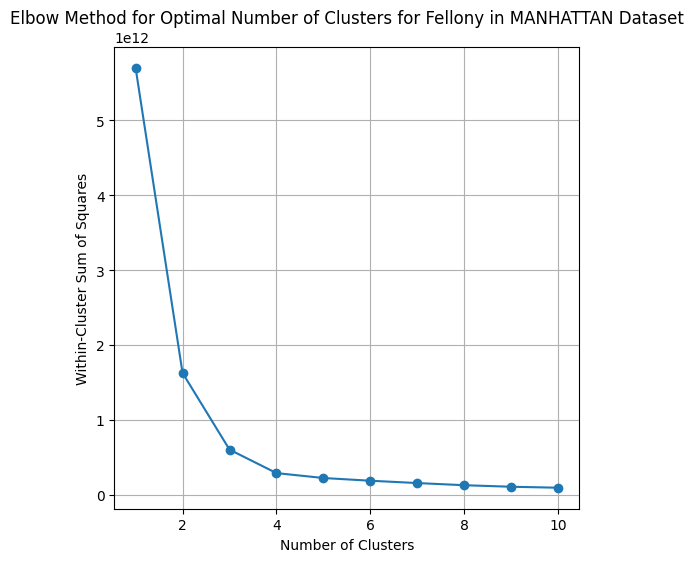

In [ ]:
#%%

# Elbow method for optimal number of clusters
wcss = []
for index in range(1, 11):
    kmeans = KMeans(n_clusters=index)
    kmeans.fit(df_fellony)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method for Optimal Number of Clusters for Fellony in MANHATTAN Dataset')
plt.grid(True)
plt.show()

A sharp decrease in the within-cluster sum of squares as the number of clusters increases from 1 to 2. This suggests a significant reduction in variance within clusters when the data is segmented into two clusters.

Beyond 2 clusters, the decrease in the within-cluster sum of squares becomes more gradual and levels off as the number of clusters increases, particularly noticeable from 3 clusters onward.

This type of analysis is crucial in cluster analysis to help decide the number of clusters that best captures the inherent groupings in the data with minimal within-cluster variance. 

The "elbow" point, typically where the rate of decrease sharply shifts, suggests the optimal number of clusters. In this graph, the elbow is at 2 clusters, indicating that two clusters might be optimal for this particular dataset on felonies in Manhattan.

d:\SAIT\aDATA475\VS_Python\Final Assignment\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


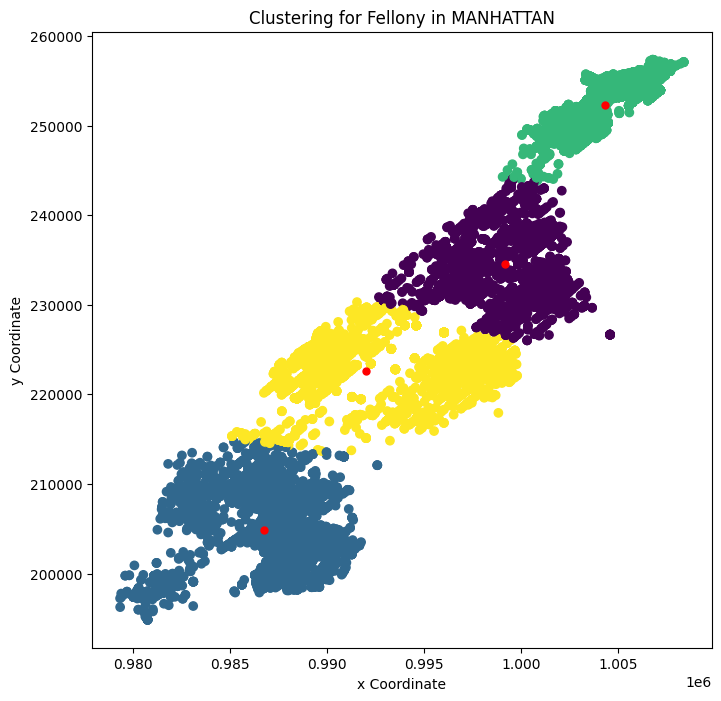

In [ ]:
#%%

# Visualization of clusters with centroids
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_fellony)
clusters = kmeans.predict(df_fellony)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 8))
plt.scatter(df_fellony.iloc[:, 0], df_fellony.iloc[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=100, color='red', label='Centroids')
plt.xlabel('x Coordinate')
plt.ylabel('y Coordinate')
plt.title('Clustering for Fellony in MANHATTAN')
plt.show()

The x-axis is labeled "X Coordinate" and ranges approximately from 0.980 to 1.005 million, while the y-axis is labeled "Y Coordinate" and ranges from about 200000 to 260000. Different colors represent different clusters of felony incidents:

Blue cluster in the lower left
Yellow cluster in the middle
Purple cluster in the upper middle
Green cluster in the upper right

Each cluster is marked with a red dot, possibly indicating a central point or a significant location within each cluster. This plot likely serves to analyze the geographical distribution and concentration areas of felony incidents within Manhattan, aiding in understanding patterns or hotspots for criminal activity.